<a href="https://colab.research.google.com/github/porzhang/Recommendation-system/blob/main/NBA_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
        
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [3]:
data= pd.read_csv("https://raw.githubusercontent.com/Mathuran-Mang/NBA-MVP-Prediction-Model/main/player_stats.csv")
data

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
0,1,Kareem Abdul-Jabbar,32,LAL,147.0,147.0,221,0.665,82,38.3,...,15.7,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3
1,2,Julius Erving,29,PHI,31.5,31.5,221,0.143,78,36.1,...,13.3,30.3,7.3,5.2,12.5,0.213,5.7,1.9,7.6,6.8
2,3,George Gervin,27,SAS,19.0,19.0,221,0.086,78,37.6,...,10.3,31.7,9.3,1.3,10.6,0.173,5.5,-1.6,3.9,4.4
3,4,Larry Bird,23,BOS,15.0,15.0,221,0.068,82,36.0,...,14.0,25.3,5.6,5.6,11.2,0.182,3.0,1.5,4.5,4.8
4,5T,Tiny Archibald,31,BOS,2.0,2.0,221,0.009,80,35.8,...,19.7,17.0,5.9,2.9,8.9,0.148,1.4,-0.3,1.1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,10,Rudy Gobert,28,UTA,0.0,8.0,1010,0.008,71,30.8,...,13.7,17.0,6.1,5.2,11.3,0.248,2.1,2.8,4.9,3.8
675,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,36.4,...,18.0,30.2,0.5,3.2,3.7,0.075,2.6,1.1,3.7,3.4
676,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,32.4,...,19.6,20.2,2.7,3.3,6.0,0.153,0.7,2.2,2.9,2.3
677,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,...,15.2,31.9,3.0,2.6,5.6,0.179,5.9,2.3,8.1,3.8


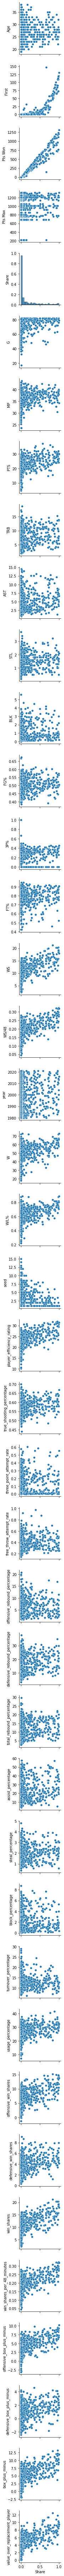

In [4]:
sns.pairplot(data = data, x_vars=['Share'])


In [5]:
np.corrcoef(data["Pts Won"], data["WS"])

array([[1.        , 0.60173775],
       [0.60173775, 1.        ]])

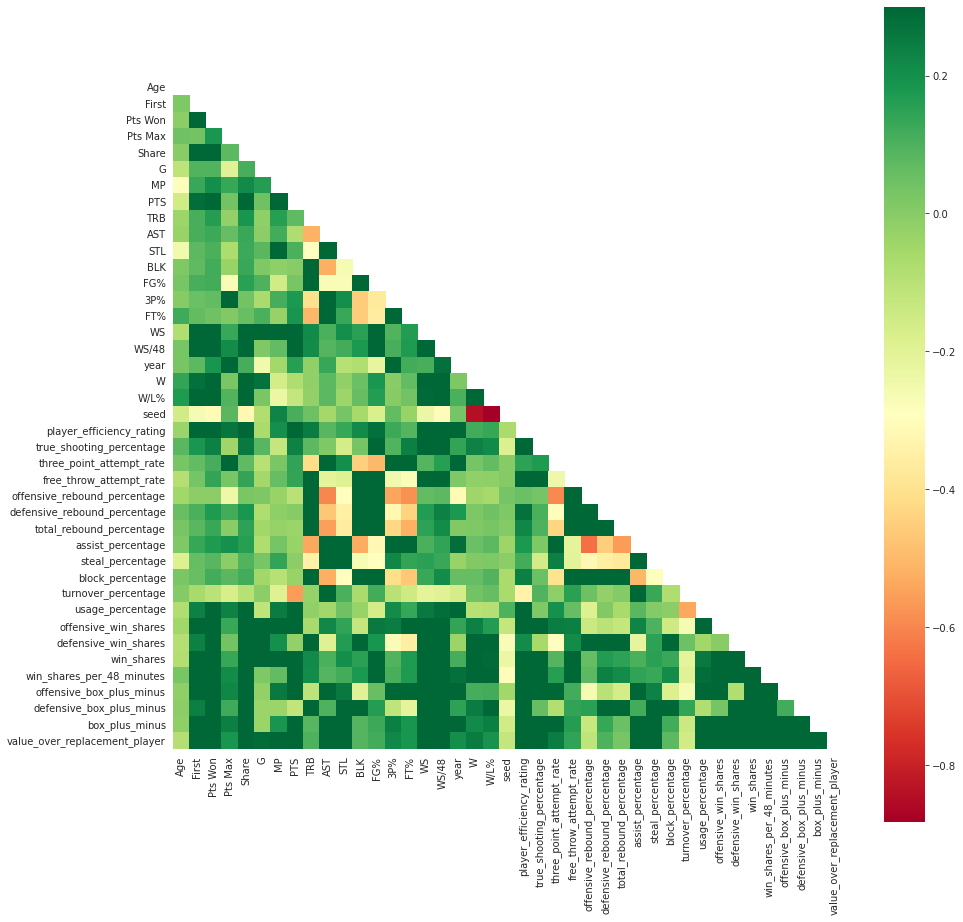

In [13]:
corr_matrix = data.corr()

#plot heat map
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=.3, square=True,cmap="RdYlGn")

In [11]:
data.corr()['Share'].sort_values()

seed                            -0.323283
turnover_percentage             -0.092862
Age                             -0.001800
offensive_rebound_percentage     0.025482
3P%                              0.040934
FT%                              0.059078
three_point_attempt_rate         0.072720
Pts Max                          0.078242
steal_percentage                 0.096360
G                                0.110165
year                             0.111664
block_percentage                 0.119449
STL                              0.126365
AST                              0.130440
BLK                              0.133683
free_throw_attempt_rate          0.139632
total_rebound_percentage         0.148116
FG%                              0.154296
assist_percentage                0.158710
defensive_rebound_percentage     0.182973
TRB                              0.188887
MP                               0.213530
true_shooting_percentage         0.256370
W                                0

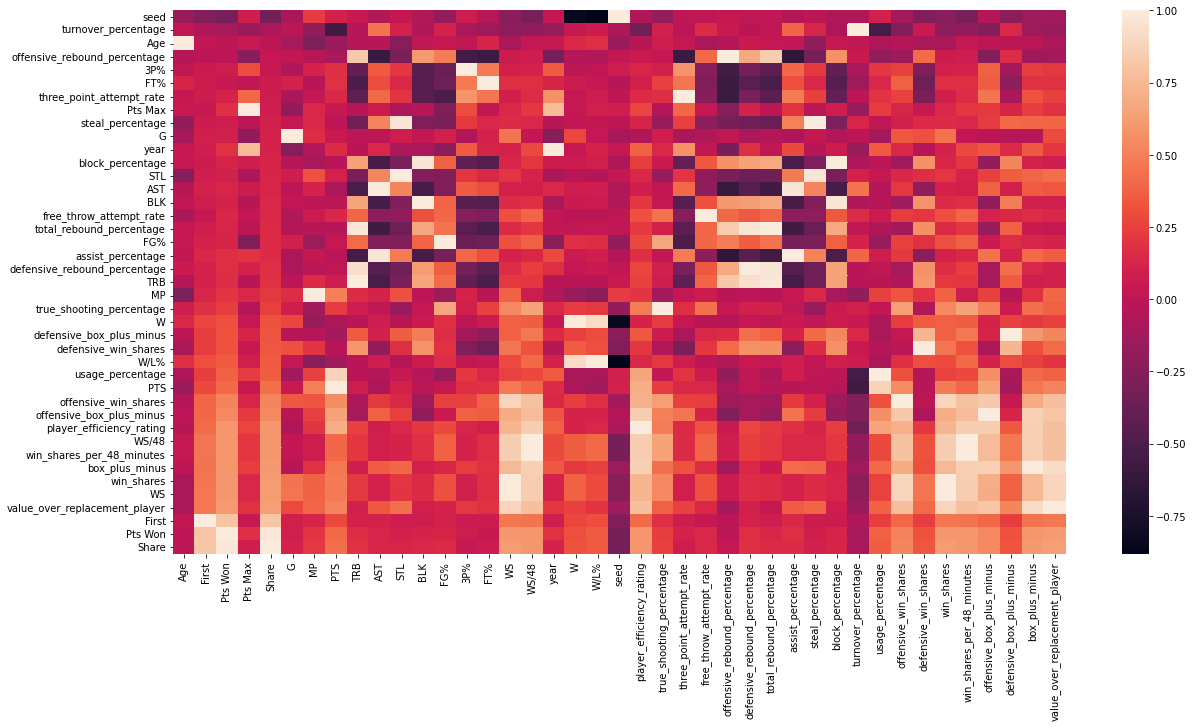

In [43]:
plt.figure(figsize = (20,10))
data2 = data.copy()
#data2.drop(['Age','First','Player','team','Tm'], axis=1, inplace=True)
sns.heatmap(data2.corr().sort_values(by='Share',ascending=True));

In [36]:
data2000 = data[data['year']>=2000]
data2000

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
370,1,Shaquille O'Neal,27,LAL,120.0,1207.0,1210,0.998,79,40.0,...,9.9,31.2,11.7,7.0,18.6,0.283,7.3,2.0,9.3,9.0
371,2,Kevin Garnett,23,MIN,0.0,408.0,1210,0.337,81,40.0,...,13.6,27.4,6.1,5.6,11.6,0.172,4.6,1.7,6.3,6.8
372,3,Alonzo Mourning,29,MIA,0.0,367.0,1210,0.303,79,34.8,...,13.1,28.1,7.3,5.6,12.9,0.226,3.1,2.2,5.3,5.0
373,4,Karl Malone,36,UTA,0.0,312.0,1210,0.258,82,35.9,...,11.4,31.9,10.7,4.5,15.3,0.249,6.4,1.1,7.5,7.1
374,5,Tim Duncan,23,SAS,0.0,248.0,1210,0.205,74,38.9,...,13.5,28.7,6.7,6.4,13.0,0.218,3.8,1.8,5.6,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,10,Rudy Gobert,28,UTA,0.0,8.0,1010,0.008,71,30.8,...,13.7,17.0,6.1,5.2,11.3,0.248,2.1,2.8,4.9,3.8
675,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,36.4,...,18.0,30.2,0.5,3.2,3.7,0.075,2.6,1.1,3.7,3.4
676,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,32.4,...,19.6,20.2,2.7,3.3,6.0,0.153,0.7,2.2,2.9,2.3
677,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,...,15.2,31.9,3.0,2.6,5.6,0.179,5.9,2.3,8.1,3.8


In [46]:
from sklearn.model_selection import train_test_split
data2.drop(['Rank','Age','First','Player','team','Tm','Pts Won'], axis=1, inplace=True)
X =data2
Y = data['Share']
X_train = X[:-20]

In [41]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,Y_train)
y_pred=linreg.predict(X_test)